In [10]:
import numpy as np        #mainly used for creating multidimensional arrays
import pandas as pd       #mainly used for creating and modifying the dataset

In [11]:
df=pd.read_csv('u.data.csv',sep='\t',names=['user_id','item_id','rating','timestamp'])
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [12]:
df[df['user_id']==0]

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [13]:
df[df['user_id']==200]

,user_id,item_id,rating,timestamp
15,200,222,5,876042340
192,200,673,5,884128554
246,200,318,5,884128458
329,200,304,5,876041644
370,200,96,5,884129409
...,...,...,...,...
88777,200,1028,2,884128176
90898,200,465,4,884129112
93203,200,139,3,884130540
94872,200,447,4,884130014


In [14]:
movie_titles=pd.read_csv('Movie_Id_Titles.csv')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [15]:
df=pd.merge(df,movie_titles,on='item_id')
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #gives us the white background
%matplotlib inline     # show all the graphs within this jupiter notebook

UsageError: unrecognized arguments: # show all the graphs within this jupiter notebook


In [23]:
df_rating_avj=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
df_rating_avj

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [25]:
df_rating_count=pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False))
df_rating_count

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Great Day in Harlem, A (1994)",1
"Other Voices, Other Rooms (1997)",1
Good Morning (1971),1


In [30]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [31]:
#adding new column to ratings dataframe
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

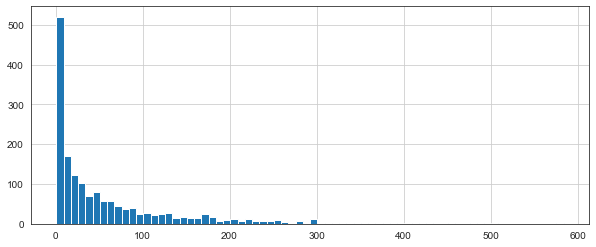

In [32]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

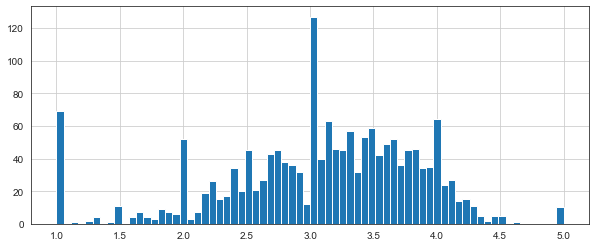

In [33]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

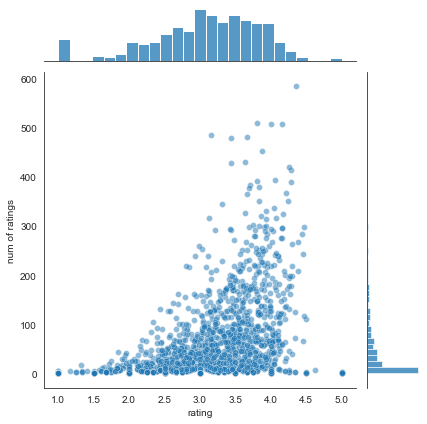

In [35]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of how the data looks like, let's move to creating a simple recommendation system.

# Recommending similar movies

In [36]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#sorting
ratings.sort_values('num of ratings',ascending=False)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [40]:
starwars_user_ratings=moviemat['Star Wars (1977)']
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [42]:
liarliar_user_ratings=moviemat['Liar Liar (1997)']
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [44]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

C:\Users\sayan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sayan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [45]:
similar_to_liarliar=moviemat.corrwith(liarliar_user_ratings)
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [50]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [51]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [52]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41
Zeus and Roxanne (1997),0.818182,6


In [54]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [57]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [58]:
corr_liarliar=corr_liarliar.join(ratings['num of ratings'])
corr_liarliar

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
1-900 (1994),NaN,5
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
...,...,...
Young Guns II (1990),0.352174,44
"Young Poisoner's Handbook, The (1995)",0.445016,41
Zeus and Roxanne (1997),-0.500000,6


In [62]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
